# Paws vs. Whiskers: Building Your Own Cat vs. Dog Classifier Using Keras


**Introduction:**

In today's digital age, image classification has become an integral part of various applications, from social media content filtering to medical diagnostics. One of the classic tasks in image classification is distinguishing between cats and dogs using Convolutional Neural Networks (CNNs) architecture. With the advancements in deep learning and frameworks like Keras, building such classifiers has become more accessible even with limited computational resources.

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

2024-04-08 22:42:39.885541: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 22:42:39.885683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 22:42:40.016963: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import tensorflow as tf
from tensorflow import keras
# Define paths to the directories containing the images
train_dir = '/kaggle/input/dogs-vs-cats/train'
test_dir = '/kaggle/input/dogs-vs-cats/test'

# Define image size and batch size
image_size = (256, 256)
batch_size = 32

# Create training and validation datasets using image_dataset_from_directory
# To load a small batch of data in RAM - use generators (image_dataset_from_directory) from keras library

train_ds = keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='int',    # assign 0 and 1 to cat and dog respectively
    batch_size=batch_size,
    image_size=image_size,  # converting the size of all images into one standard size
    validation_split=0.2,  # Splitting 20% of the data for validation
    subset='training',  # Training dataset
    seed=42 
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,  # Splitting 20% of the data for validation
    subset='validation',  # Validation dataset
    seed=42 
)

# convert the numpy array output pixels values from (0 to 255) to (0 to 1) - NORMALIZE
# Normalize the pixel values
def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


**Model Building**

In [3]:
# create CNN model
# 3 convulation layers with 32,64 and 128 filters respectively
model = Sequential()

# CONVULATION LAYERS + POOLING LAYERS
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

# FULLY CONNECTED FC LAYERS
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [5]:
# MODEL COMPILATION - BINARY CLASSIFICATION PROBLEM
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Select Hardware Accelerator - GPU to fasten the Training period

In [6]:
# EXECUTE THE MODEL
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
  2/500 ━━━━━━━━━━━━━━━━━━━━ 47s 96ms/step - accuracy: 0.5078 - loss: 8.5192   

I0000 00:00:1712616208.149992      79 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712616208.171131      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5360 - loss: 2.7232

W0000 00:00:1712616244.136493      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


500/500 ━━━━━━━━━━━━━━━━━━━━ 59s 82ms/step - accuracy: 0.5360 - loss: 2.7207 - val_accuracy: 0.5705 - val_loss: 0.7370
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - accuracy: 0.5523 - loss: 0.6753 - val_accuracy: 0.5620 - val_loss: 0.7936
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.5876 - loss: 0.6487 - val_accuracy: 0.6080 - val_loss: 0.6101
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.6489 - loss: 0.5966 - val_accuracy: 0.7040 - val_loss: 0.5249
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.7193 - loss: 0.5137 - val_accuracy: 0.7508 - val_loss: 0.5261
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.7554 - loss: 0.4564 - val_accuracy: 0.7467 - val_loss: 0.5544
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.7784 - loss: 0.4088 - val_accuracy: 0.6505 - val_loss: 1.0257
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.8101 - loss: 0.3560 - val_accurac

Result - 

Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.8375 - loss: 0.3402 - val_accuracy: 0.8018 - val_loss: 0.4724

**Visualize the result:-**

1. Training Accuracy vs Validation Accuracy

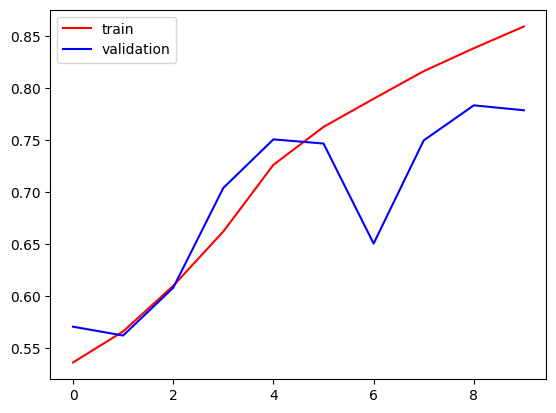

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

2. Training Loss vs Validation Loss

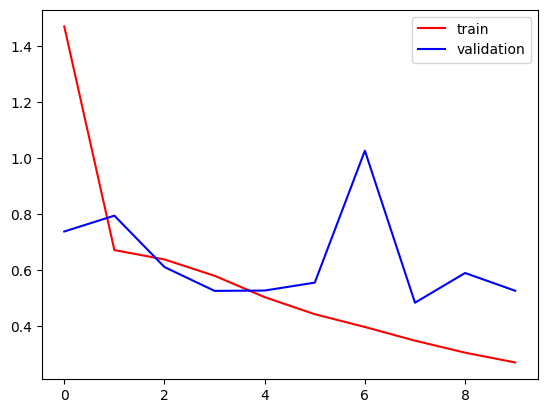

In [8]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

**Handle Overfitting**

* Increase the size of the training dataset.
* Apply data augmentation techniques.
* Implement L1 or L2 regularization.
* Utilize dropout layers during model training.
* Incorporate batch normalization layers.
* Reduce model complexity by adjusting the number of layers or neurons.

**Conclusion**

In conclusion, this notebook successfully addresses the issue of overfitting by implementing batch normalization and dropout layers. While these techniques have proven effective, further enhancements can be explored by incorporating additional strategies mentioned earlier, such as data augmentation and regularization methods. By continually refining the model with these approaches, we aim to achieve a robust and generalizable solution for our classification task